<a href="https://colab.research.google.com/github/sergioarnold87/Practica_Sergio/blob/main/Ejercicio_Intervalo_de_Confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * Estimación puntual

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random

In [2]:
np.random.seed(2020)
population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 1500000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 1000000)
population_ages = np.concatenate((population_ages1, population_ages2))

print(population_ages1.mean())
print(population_ages2.mean())
print(population_ages.mean())

52.998824666666664
27.999569
42.9991224


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc2f46710>]],
      dtype=object)

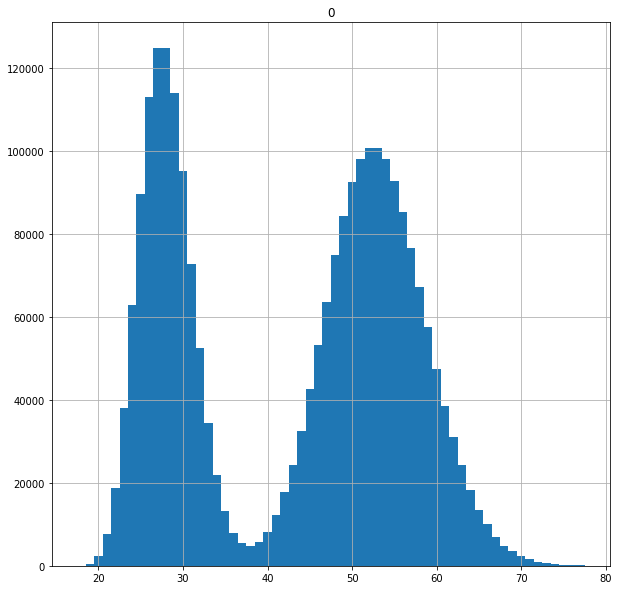

In [5]:
pd.DataFrame(population_ages).hist(bins = 60, range = (17.5, 77.5), figsize = (10,10))

In [6]:
stats.skew(population_ages)

-0.11907136129560125

In [7]:
stats.kurtosis(population_ages)

-1.4593749125303193

In [8]:
np.random.seed(42)
sample_ages = np.random.choice(population_ages, 500)
print(sample_ages)

[35 27 27 26 45 47 29 27 29 55 31 45 54 23 45 45 60 27 47 25 46 55 49 30
 49 56 59 48 52 27 27 26 58 49 52 35 50 66 57 26 31 30 25 60 49 24 51 51
 31 55 55 44 28 59 25 31 30 53 27 31 48 46 44 23 26 55 51 57 23 54 57 36
 54 43 54 63 48 31 55 23 31 55 46 49 25 29 24 29 30 23 57 32 26 52 33 28
 44 26 54 56 51 26 44 31 59 22 30 60 22 51 25 51 55 55 29 55 27 57 28 54
 33 33 54 60 50 48 46 69 46 23 56 27 54 39 50 31 62 25 30 50 28 30 55 55
 45 30 30 61 25 27 55 25 55 51 58 28 29 30 57 25 50 54 41 26 33 62 27 56
 53 30 56 60 30 58 45 54 53 49 54 58 30 48 64 28 50 30 55 61 45 29 50 27
 24 26 52 33 46 28 24 50 48 32 31 22 60 24 43 32 52 25 27 48 32 47 61 45
 55 49 50 56 28 31 26 53 50 51 25 50 30 53 53 58 23 50 61 53 53 31 26 54
 26 25 47 24 52 33 50 52 51 26 45 41 59 29 59 26 59 53 46 27 59 49 54 50
 34 60 58 21 42 55 50 52 28 34 27 51 29 30 30 51 30 29 25 27 25 52 27 24
 39 50 28 27 31 60 48 45 54 28 56 49 24 50 26 54 59 30 27 26 28 57 50 27
 51 48 31 64 50 30 55 29 25 47 34 47 64 55 52 30 54

In [9]:
population_ages.mean() - sample_ages.mean()

0.6431223999999958

In [10]:
population_races = (["blanca"]*1000000) + (["negra"]*500000) + (["hispana"]*500000) + (["asiatica"]*250000) + (["otros"]*250000)

In [11]:
for race in set(population_races):
  print("Proporcion de "+race)
  print(population_races.count(race) / 2500000)

Proporcion de asiatica
0.1
Proporcion de blanca
0.4
Proporcion de hispana
0.2
Proporcion de otros
0.1
Proporcion de negra
0.2
